# **Zomato's Partnered Restaurant Trends Analysis**

Getting ready with the environment by importing the necessary modules and files

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Creating the dataframe which we would explore

In [3]:
df=pd.read_csv("/content/Zomato data .csv")
df.head(15)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,700,other
9,Smacznego,Yes,No,4.2/5,504,550,Cafes


Checking for null or empty data's, incompatible data types, and fix them, to avoid outliers.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


Converting the fraction part of votes column and removing the denominator, as all the ratings are out of 5. Will replace it with the numerator typecasted to float

In [5]:
def rem_dem(info):
  a=str(info).split('/')
  return float(a[0])

df['rate']=df['rate'].apply(rem_dem)
df


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [6]:
df.columns=['Name','Online Order', 'Table Booked', 'Ratings (out of 5)', 'Total Votes', 'Estimate Cost For 2', 'Type']
df.head()

,Name,Online Order,Table Booked,Ratings (out of 5),Total Votes,Estimate Cost For 2,Type
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Re-checking for any scope of improvements

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 148 non-null    object 
 1   Online Order         148 non-null    object 
 2   Table Booked         148 non-null    object 
 3   Ratings (out of 5)   148 non-null    float64
 4   Total Votes          148 non-null    int64  
 5   Estimate Cost For 2  148 non-null    int64  
 6   Type                 148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# **Now, its time to draw a few conclusions**

Text(0, 0.5, ' ')

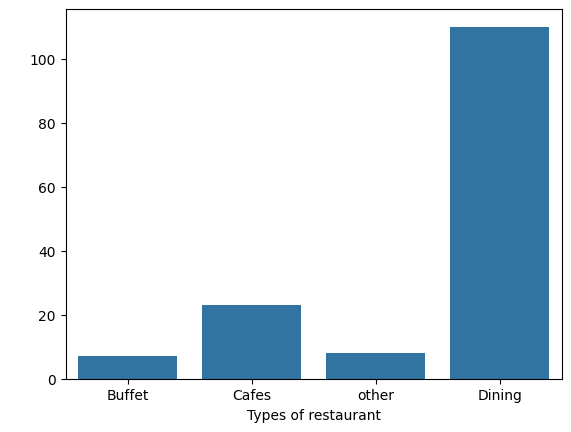

In [8]:
sns.countplot(x=df['Type'])
plt.xlabel("Types of restaurant")
plt.ylabel(' ' )

# **Here we found that the majority of people preferred the restaurants with Dining option - Zomato should work on there buffet and cafes for this**

Text(0, 0.5, 'Total Number of Votes')

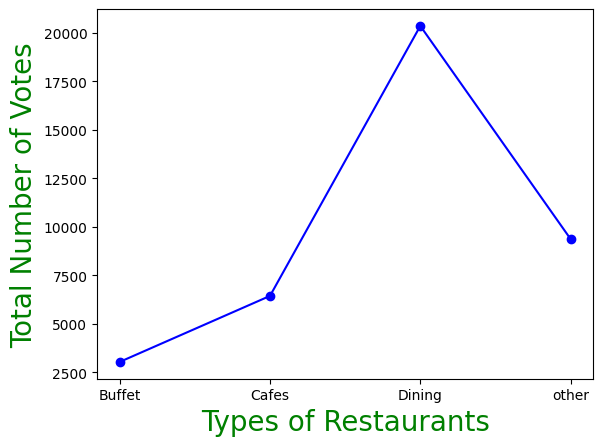

In [9]:
grouped_data=df.groupby('Type')['Total Votes'].sum()
# grouped_data
new_chart=pd.DataFrame({'votes':grouped_data})
# new_chart
plt.plot(new_chart, c='blue', marker='o')
plt.xlabel("Types of Restaurants", size=20,c='green')
plt.ylabel("Total Number of Votes", size=20,c='green')

# **Another observation supporting the previous observation is that the majority votes were recieved by the Dining restaurants (reason is simple - its the most visited) while others are no where near.**

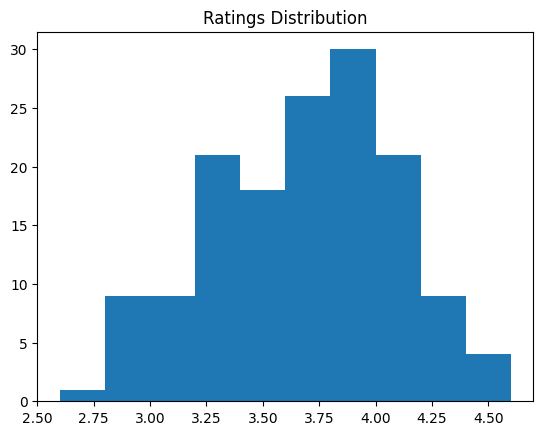

3.6331081081081082


In [10]:
plt.hist(df['Ratings (out of 5)'], bins=10)
plt.title('Ratings Distribution')
plt.show()
print((df['Ratings (out of 5)']).mean())

# **Third observation is that a majority of the customers gave a rating in the range of 3.75 to 4, but not many gave above 4.5 stars. The average ratings recieved by Zomato was just 3.63 out of 5.**

In [11]:
average_ratings = df.groupby('Type')['Ratings (out of 5)'].mean()

# Convert the result to a DataFrame if needed
average_chart = pd.DataFrame({'Average Ratings': average_ratings})
average_chart

,Average Ratings
Type,
Buffet,3.842857
Cafes,3.765217
Dining,3.571818
other,3.912500


# **Even though majority votes were recieved by Dining type of restaurants and they were visited more often, the buffet still has a more satisfactory average customer ratings after the 'others' category.**

<Axes: xlabel='Estimate Cost For 2', ylabel='count'>

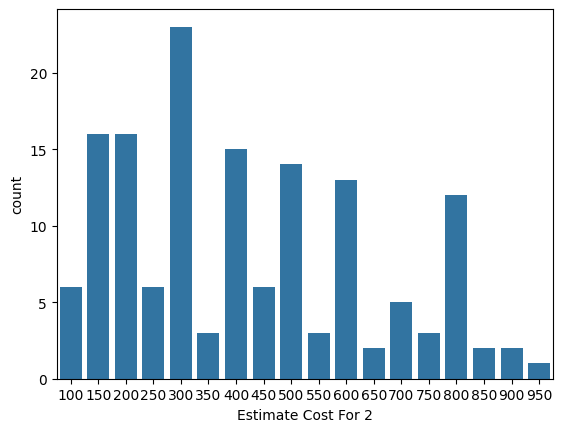

In [12]:
cost_fortwo=df['Estimate Cost For 2']
sns.countplot(x=cost_fortwo)

# **Most people preffered having food at restaurants in the range of 250-350 for 2 and very few have tried the restaurants with charges above 850 for 2**

<Axes: xlabel='Online Order', ylabel='Ratings (out of 5)'>

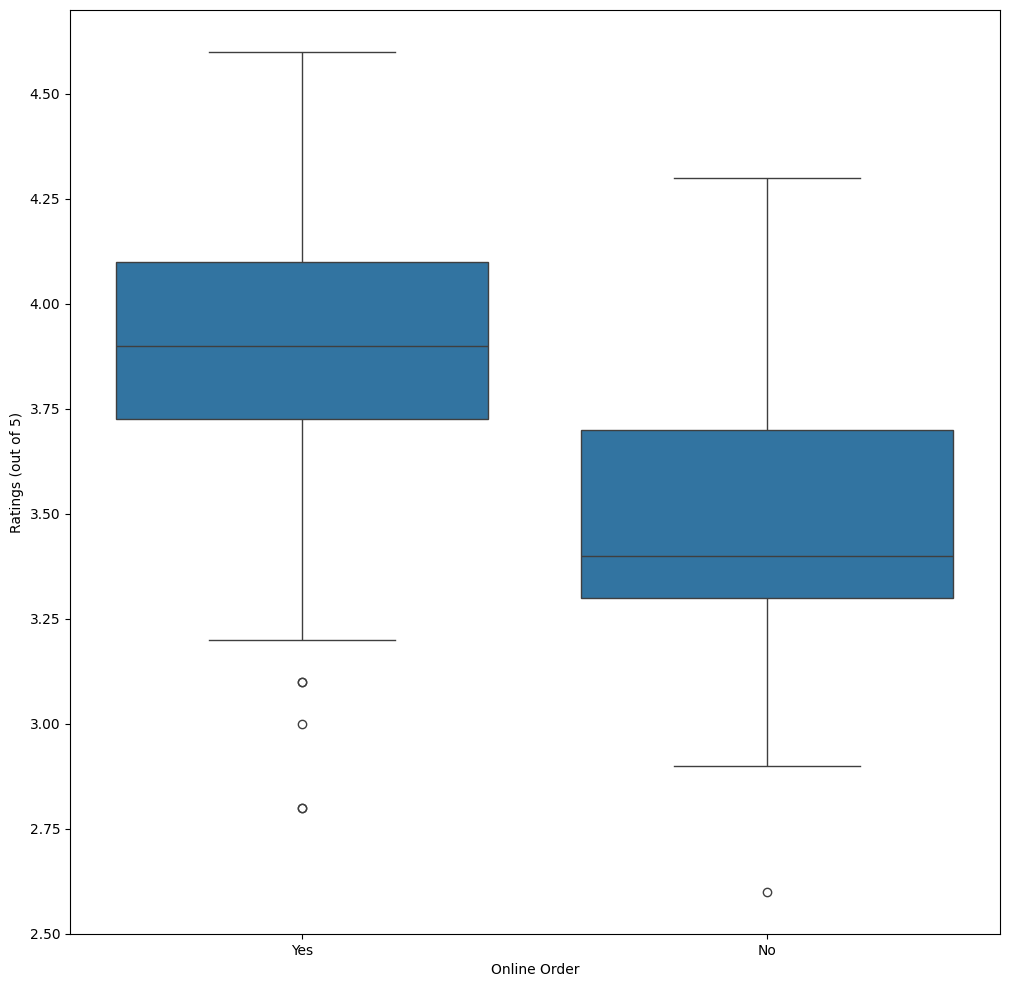

In [13]:
plt.figure(figsize=(12,12))
sns.boxplot(x='Online Order', y='Ratings (out of 5)', data= df)

# **People who ordered food online gave better ratings than the ones ordering offline. Possible reasons could be the unheigenic ambience of restaurants, or some misbehaviour of the staffs.**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 148 non-null    object 
 1   Online Order         148 non-null    object 
 2   Table Booked         148 non-null    object 
 3   Ratings (out of 5)   148 non-null    float64
 4   Total Votes          148 non-null    int64  
 5   Estimate Cost For 2  148 non-null    int64  
 6   Type                 148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


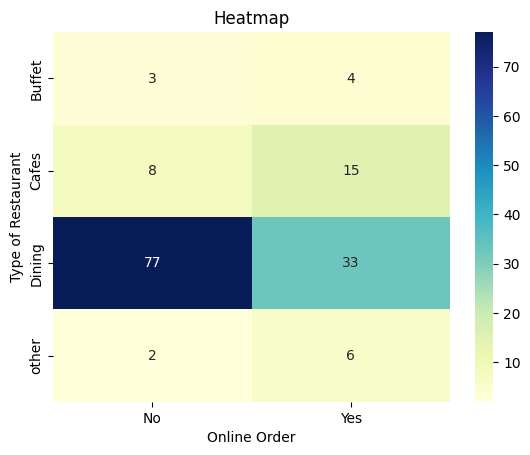

In [15]:
pivot_table=df.pivot_table(index='Type', columns='Online Order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Type of Restaurant")
plt.show()

# **For Buffet, people prefer both online as well as offline food. For Cafes, people have more preference towards online orders. But for Dining, a strong inclination towards offline orders are observed.**

# **The possible reasons behind this could be the ambience and behaviour of staffs at Dining restaurants, and other types of restaurants should also adopt similar strategies to improve there sales with Zomato's customer**